# ***Quantum State Preparation Algorithmn***

## Input
The input for the algorithm is the classical description of a state i.e we are providing non zero basis states with their respective probabilities.

[[Basis-1], Probability], [[Basis-2], Probability] , [[Basis-3], Probability]]

# **Implementation of the Algorithms**


## **Classiq**

In [ ]:
# Installing classiq
!pip install -U classiq

# Authenticating Classiq
import classiq
classiq.authenticate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.6/151.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.9/387.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 696.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB

In [ ]:
# Importing necessary modules for classiq
from sympy import pi
import math
import numpy as np
from classiq import (allocate,qfunc,QArray,CX,X,RY,invert,List,Array,QBit,Output,free,QCallable,
                            H,U,RX,control,CRZ,SWAP,repeat,create_model, Analyzer,prepare_state,
                            create_model, synthesize, show , QuantumProgram, CReal, CInt, qfunc, execute)

In [ ]:
# Function

def Sparse_state_classiq(S):

      List_1=[]    # store history of Gate types and their parameters (qubit numbering on which they are applied)
      List_2=[]    # Store X Gate history
      List_3=[]    # Store CX Gate history
      List_4=[]    # Store Multi- controlled Gate history
      List_5=[]    # Store Last step X Gates information


      n=len(S[0][0])        # n is number of qubits in required Sparse State.
      n9=[]                 # list of required number of control qubits in each splitting stage

      def find_qubit_with_unequal_sets(T): # This function is called from classical part of the algorithm i,e, function Algo1()

          best_qubit = None
          T_0=[]
          T_1=[]
          Max_difference = float('-inf')  # Initialize to negative infinity

          for b in range(n):
              # Split T into T_0 and T_1 based on qubit b
              T_0 = [x for x in T if x[0][b] == 0]
              T_1 = [x for x in T if x[0][b] == 1]

              # Check if both sets are non-empty
              if len(T_0) != 0 and len(T_1) != 0:
                  difference = abs(len(T_0) - len(T_1))
                  if difference > Max_difference:
                      Max_difference = difference
                      best_qubit = b
                      best_T_0 = T_0
                      best_T_1 = T_1

          return best_qubit,best_T_0, best_T_1
      def NOT(a):       # This is also needed as a part of updating basis state set S in each recursion of Algo1()
          if a==0:
              return 1
          else:
              return 0


      def Algo_1():    # This is classical function called by main() function which can create Required Gates information in Lists
          dif_qubits = []
          dif_values = []
          T = S
          P = find_qubit_with_unequal_sets(T)


      # Step 5: Main loop
          while len(T) > 1:
          # Step 6: Find the qubit b
              P = find_qubit_with_unequal_sets(T)  # We already implement this logic to find the best qubit best_T_0 and best_T_1 above
              b = P[0]
              T_0 = P[1]
              T_1 = P[2]

          # Step 7: Append b to dif_qubits

              dif_qubits.append(b)

              if len(T_0) < len(T_1):
              # Step 9: Set T = T_0 and append 0 to dif_values
                  T = T_0
                  dif_values.append(0)
              else:
              # Step 10: Set T = T_1 and append 1 to dif_values
                  T = T_1
                  dif_values.append(1)
              # Step 14: Pop the last value appended to dif_qubits and store it as dif
          dif = dif_qubits.pop();
          #print("dif is  ", dif)
      # Step 15: Pop the last value that was appended to dif_values
          dif_values.pop();
      # Step 16: Store the single element in T as x_1
          x_1 = T[0]
          #print("x1 is  ", x_1)
      # step 17
      # T_prime subset of S denote the set of strings that have the values in dif_values on the bits dif_qubits
          T_prime = [x for x in S if all(x[0][q] == v for q, v in zip(dif_qubits, dif_values))]
      # Step 18: Remove x_1 from T'
          T_prime.remove(x_1)
      # Step 19: Second While loop for T_prime
          while len(T_prime) > 1:
          # Step 22: Find the qubit b_prime
              R = find_qubit_with_unequal_sets(T_prime)  # Implement logic to find the best qubit
              b_prime = R[0]
              T_prime_0 = R[1]
              T_prime_1 = R[2]
          # Step 7: Append b to dif_qubits

              dif_qubits.append(b_prime)

              if len(T_prime_0) < len(T_prime_1):
              # Step 9: Set T = T_0 and append 0 to dif_values
                  T_prime = T_prime_0
                  dif_values.append(0)
              else:
              # Step 10: Set T = T_1 and append 1 to dif_values
                  T_prime = T_prime_1
                  dif_values.append(1)
          x_2 = T_prime[0]
          #print("x2 is ",x_2)


          if x_1[0][dif] != 1:

              #X(q1[n-1-dif])
              List_1.append(1)
              List_2.append(n-1-dif)
              for x in S:
                  x[0][dif]= NOT(x[0][dif])


          for b in range(n):
              if b != dif and x_1[0][b] != x_2[0][b]:
                  # target b controlled on dif

                  List_1.append(2)
                  sx=[n-1-dif,n-1-b]
                  List_3.append(sx)
                  for x in S:
                      if x[0][dif]==1:
                          x[0][b]= NOT(x[0][b])

          for b in dif_qubits:
              if x_2[0][b] != 1:
                  # not gate on line b

                  List_1.append(1)
                  List_2.append(n-1-b)
                  for x in S:
                      x[0][b]= NOT(x[0][b])

          # virtual merging operation begins

          beta = x_1[1]            # probability of x_1
          alpha = x_2[1]           #probability of x_2

          # x_1 would merge into x_2   i.e.  x2 absorb probability of x1
          x_2[1]=x_2[1]+x_1[1]
          alpha=alpha/x_2[1]
          beta=beta/x_2[1]
          List_1.append(3)

          if len(dif_qubits)>0:
              n9.append(len(dif_qubits))
              sy = [alpha,beta,dif_qubits,dif]
          else:
              sy = [alpha,beta,dif]

          List_4.append(sy)
          #print("S before removing x1 is",S)
          S.remove(x_1)
          #print("S after removing x1 is",S)
          if len(S)>1:
              Algo_1()

          else:
              List_1.append(4)
              List_5.append(x_2[0])


      @qfunc
      def my_controlled_unitary(q:QArray[QBit], w: CReal, ctrl:QArray[QBit],target:CInt) -> None:

        RY(w,q[target])
        control(ctrl,lambda: X(q[target]))
        RY(-w,q[target])

      @qfunc
      def my_unitary(q:QArray[QBit], w:CReal,target:CInt) -> None:

        RY(w,q[target])
        X(q[target])
        RY(-w,q[target])


      @qfunc
      def main() -> None:
          q = QArray("q")
          allocate(n, q)

          if len(S)>1:
              Algo_1()

              n1=len(List_1)
              if len(n9)>0:
                  s=max(n9)
                  aux = QArray("aux")
                  allocate(s, aux)

              count=0
              for num in reversed(range(n1)):
                  read_1 = List_1[num]
                  if read_1==1:
                      n2=len(List_2)
                      read_2=List_2[n2-1]
                      X(q[read_2])
                      List_2.pop();

                  if read_1==2:

                      n3=len(List_3)
                      read_3=List_3[n3-1]
                      r1=read_3[0]
                      r2=read_3[1]
                      CX(q[r1],q[r2])
                      List_3.pop();

                  if read_1 ==3:
                      n4=len(List_4)
                      read_4=List_4[n4-1]
                      if len(read_4)==4:

                          sy1=read_4[0]  # alpha
                          sy2=read_4[1]  # beta
                          sy3=read_4[2]  # dif_qubits
                          #print("sy3 is ",sy3)
                          #print("w is ",w,"alpha is",sy1,"beta is",sy2)
                          w = np.arctan(abs(sy1**0.5)/abs(sy2**0.5))
                          #print("w is ",w,"alpha is",sy1,"beta is",sy2)


                          n7=len(sy3)
                          target = int(read_4[3])
                          count=0
                          for b in range(n7):
                                  CX(q[n-1-sy3[b]],aux[b])
                                  count=count+1
                                  # print("CX operated in aux",b-1)
                          #print("target is",target)
                          my_controlled_unitary(q, w,aux[0:count],(n-1)-target)
                          for b in range(0,n7):
                                    CX(q[n-1-sy3[b]],aux[b])

                      else:


                          sy1=read_4[0]  # alpha
                          sy2=read_4[1]   # beta
                          w = np.arctan(abs(sy1**0.5)/abs(sy2**0.5))
                          #print("w is ",w,"alpha is",sy1,"beta is",sy2)
                          target = int(read_4[2])
                          # foo2(q,w,n-1-target)
                          my_unitary(q,w,(n-1)-target)
                      List_4.pop();
                  if read_1==4:
                      read_5 = List_5[0]
                      #print("read5 is",read_5)
                      n4= len(read_5)
                      for b in range(0,n4):
                          if read_5[b]==1:
                              X(q[n-1-b])
                      List_5.pop();

              if len(n9)>0:
                free(aux)
      # This else is for cases of 1 basis state preparation
          else:
              for b in range(0,n):
                  if S[0][0][b]==1:
                      X(q[n-1-b])



      model = create_model(main)
      qprog = synthesize(model)
      # print(execute(qprog).result()[0].value.counts)
      # #circuit = show(qprog)

      # analyzer = Analyzer(circuit=QuantumProgram.from_qprog(qprog))
      # Classiq_Depth = analyzer.circuit.program_circuit.depth
      # # print(f"The depth of a circuit is:{depth}")

      # return  Classiq_Depth , qprog

      return qprog

In [ ]:
# Input
# S= [[[0,0],1/2],[[1,1],1/2]] # Example 01

# S =[[[0,0,0],1/2],[[1,1,1],1/2]] # Example 02

S =[[[0,0,0,0],1/2], [[1,1,1,1],1/2]] # Example 03

# S =[[[0,0,0,0,0],1/2], [[ 1, 1,1,1,1],1/2]] # Example 04

# S = [[[0,0,0,0,0,0],1/2], [[ 1, 1,1,1,1,1],1/2]] # Example 05

In [ ]:
# Results

qprog = Sparse_state_classiq(S)

In [ ]:
# Circuit Diagram

show(qprog)

Opening: https://platform.classiq.io/circuit/7c959404-b743-45de-b228-51a699e60816?version=0.43.3


In [ ]:
# State
count = execute(qprog).result()[0].value.counts
print(f"The state of a circuit is:{count}")

The state of a circuit is:{'1111': 1038, '0000': 1010}


In [ ]:
# Circuit Depth

analyzer = Analyzer(circuit=QuantumProgram.from_qprog(qprog))
Classiq_Depth = analyzer.circuit.program_circuit.depth
print(f"The depth of a circuit is:{Classiq_Depth}")

The depth of a circuit is:4


## **Qiskit**

In [ ]:
# Installing qiskit and related libraries

!pip install qiskit
!pip install qiskit-aer
!pip install qiskit[visualization]
!pip install qutip

# Import necessary modules for qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
import qiskit.quantum_info as qi
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit.circuit.library import HGate, MCXGate
from qiskit.quantum_info import random_unitary
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qutip import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=b32369688951b642bcb86fc0a4e3b922507e4b3e3c18da1ad4ce755de894c3d8
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Function

def Sparse_state_qiskit(S):

  List_1=[]    # store history of Gate types and their parameters (qubit numbering on which they are applied)
  List_2=[]    # Store X Gate history
  List_3=[]    # Store CX Gate history
  List_4=[]    # Store Multi- controlled Gate history
  List_5=[]    # Store Last step X Gates information

  n=len(S[0][0])        # n is number of qubits in required Sparse State.
  n9=[]                 # list of required number of control qubits in each splitting stage



  def find_qubit_with_unequal_sets(T): # This function is called from classical part of the algorithm i,e, function Algo1()

    best_qubit = None
    T_0=[]
    T_1=[]
    Max_difference = float('-inf')  # Initialize to negative infinity

    for b in range(n):
        # Split T into T_0 and T_1 based on qubit b
        T_0 = [x for x in T if x[0][b] == 0]
        T_1 = [x for x in T if x[0][b] == 1]

        # Check if both sets are non-empty
        if len(T_0) != 0 and len(T_1) != 0:
            difference = abs(len(T_0) - len(T_1))
            if difference > Max_difference:
                Max_difference = difference
                best_qubit = b
                best_T_0 = T_0
                best_T_1 = T_1

    return best_qubit,best_T_0, best_T_1



  def NOT(a):       # This is also needed as a part of updating basis state set S in each recursion of Algo1()
      if a==0:
          return 1
      else:
          return 0


  def Algo_1():    # This is classical function called by main() function which can create Required Gates information in Lists

        dif_qubits = []
        dif_values = []
        T = S
        P = find_qubit_with_unequal_sets(T)


        # Step 5: Main loop
        while len(T) > 1:
        # Step 6: Find the qubit b
            P = find_qubit_with_unequal_sets(T)  # We already implement this logic to find the best qubit best_T_0 and best_T_1 above
            b = P[0]
            T_0 = P[1]
            T_1 = P[2]

        # Step 7: Append b to dif_qubits
            dif_qubits.append(b)
            if len(T_0) < len(T_1):
            # Step 9: Set T = T_0 and append 0 to dif_values
                T = T_0
                dif_values.append(0)
            else:
            # Step 10: Set T = T_1 and append 1 to dif_values
                T = T_1
                dif_values.append(1)
            # Step 14: Pop the last value appended to dif_qubits and store it as dif
        dif = dif_qubits.pop();
    # Step 15: Pop the last value that was appended to dif_values
        dif_values.pop();
    # Step 16: Store the single element in T as x_1
        x_1 = T[0]
    # step 17
    # T_prime subset of S denote the set of strings that have the values in dif_values on the bits dif_qubits
        T_prime = [x for x in S if all(x[0][q] == v for q, v in zip(dif_qubits, dif_values))]
    # Step 18: Remove x_1 from T'
        T_prime.remove(x_1)
    # Step 19: Second While loop for T_prime
        while len(T_prime) > 1:
        # Step 22: Find the qubit b_prime
            R = find_qubit_with_unequal_sets(T_prime)  # Implement logic to find the best qubit
            b_prime = R[0]
            T_prime_0 = R[1]
            T_prime_1 = R[2]
        # Step 7: Append b to dif_qubits

            dif_qubits.append(b_prime)

            if len(T_prime_0) < len(T_prime_1):
            # Step 9: Set T = T_0 and append 0 to dif_values
                T_prime = T_prime_0
                dif_values.append(0)
            else:
            # Step 10: Set T = T_1 and append 1 to dif_values
                T_prime = T_prime_1
                dif_values.append(1)
        x_2 = T_prime[0]

        if x_1[0][dif] != 1:
            List_1.append(1)
            List_2.append(n-1-dif)
            for x in S:
                x[0][dif]= NOT(x[0][dif])


        for b in range(n):
            if b != dif and x_1[0][b] != x_2[0][b]:
                List_1.append(2)
                sx=[n-1-dif,n-1-b]
                List_3.append(sx)
                for x in S:
                    if x[0][dif]==1:
                        x[0][b]= NOT(x[0][b])

        for b in dif_qubits:
            if x_2[0][b] != 1:
                List_1.append(1)
                List_2.append(n-1-b)
                for x in S:
                    x[0][b]= NOT(x[0][b])

        # virtual merging operation begins

        beta = x_1[1]            # probability of x_1
        alpha = x_2[1]           #probability of x_2

        # x_1 would merge into x_2   i.e.  x2 absorb probability of x1
        x_2[1]=x_2[1]+x_1[1]
        alpha=alpha/x_2[1]
        beta=beta/x_2[1]
        List_1.append(3)

        if len(dif_qubits)>0:
            n9.append(len(dif_qubits))
            sy = [alpha,beta,dif_qubits,dif]
        else:
            sy = [alpha,beta,dif]

        List_4.append(sy)
        S.remove(x_1)

        if len(S)>1:
            Algo_1()

        else:
            List_1.append(4)
            List_5.append(x_2[0])



  # Define the quantum registers and classical registers
  n = len(S[0][0])  # Replace with the desired number of qubits
  qr = QuantumRegister(n, 'q')
  circuit = QuantumCircuit(qr)



  if len(S)>1:
    Algo_1()

    n1=len(List_1)

    for num in reversed(range(n1)):
              read_1 = List_1[num]
              if read_1==1:
                  n2=len(List_2)
                  read_2=List_2[n2-1]
                  #X(q[read_2])
                  circuit.x(qr[read_2])
                  List_2.pop();

              if read_1==2:

                  n3=len(List_3)
                  read_3=List_3[n3-1]
                  r1=read_3[0]
                  r2=read_3[1]
                  #CX(q[r1],q[r2])
                  circuit.cx(qr[r1], qr[r2])
                  List_3.pop();

              if read_1 ==3:
                  n4=len(List_4)
                  read_4=List_4[n4-1]
                  #print("read4 is",read_4)
                  if len(read_4)==4:

                      sy1=read_4[0]  # alpha
                      sy2=read_4[1]  # beta
                      sy3=read_4[2]  # dif_qubits
                      #print("sy3 is ",sy3)
                      #print("w is ",w,"alpha is",sy1,"beta is",sy2)
                      w = np.arctan(abs(sy1**0.5)/abs(sy2**0.5))
                      #print("w is ",w,"alpha is",sy1,"beta is",sy2)
                      sy3 = [(n-1) - i for i in sy3]
                      target = (n-1)-read_4[3]
                      circuit.ry(w,qr[target])
                      circuit.append(MCXGate(len(sy3)), sy3+[target])
                      # circuit.mcx(qr[sy3],qr[target])
                      circuit.ry(-w,qr[target])

                  else:
                      sy1=read_4[0] # alpha
                      sy2=read_4[1]   # beta
                      w = np.arctan(abs(sy1**0.5)/abs(sy2**0.5))
                      #print("w is ",w,"alpha is",sy1,"beta is",sy2)
                      target = (n-1)-read_4[2]
                      circuit.ry(w,qr[target])
                      circuit.x(qr[target])
                      circuit.ry(-w,qr[target])
                  List_4.pop();
              if read_1==4:
                  read_5 = List_5[0]
                  #print("read5 is",read_5)
                  n4= len(read_5)
                  for b in range(0,n4):
                      if read_5[b]==1:
                          circuit.x(qr[n-1-b])
                  List_5.pop();


  # This else is for cases of 1 basis state preparation
  else:
    for b in range(0,n):
      if S[0][0][b]==1:
        circuit.x(qr[n-1-b])


  # # Choose the state vector simulator
  # simulator = Aer.get_backend('statevector_simulator')

  # # Execute the circuit on the simulator
  # new_circuit = transpile(circuit, simulator)
  # job = simulator.run(new_circuit)

  # # Get the result
  # result = job.result()

  # # Get the state vector
  # statevector = result.get_statevector()

  # state_vector_list = statevector.tolist()
  # # print("State is", state_vector_list)

  # Circuit = circuit.draw("mpl")

  # depth = circuit.depth()
  # print("Circuit Depth:", depth)
  # print("Unitaries are",dict(circuit.count_ops()))

  # return depth , Circuit

  return circuit

In [ ]:
# Input
# S= [[[0,0],1/2],[[1,1],1/2]] # Example 01

# S =[[[0,0,0],1/2],[[1,1,1],1/2]] # Example 02

S =[[[0,0,0,0],1/2], [[1,1,1,1],1/2]] # Example 03

# S =[[[0,0,0,0,0],1/2], [[ 1, 1,1,1,1],1/2]] # Example 04

# S = [[[0,0,0,0,0,0],1/2], [[ 1, 1,1,1,1,1],1/2]] # Example 05

In [ ]:
# Result
circuit = Sparse_state_qiskit(S)

In [ ]:
# State
simulator = Aer.get_backend('statevector_simulator')
new_circuit = transpile(circuit, simulator)
job = simulator.run(new_circuit)
result = job.result()
statevector = result.get_statevector()
state_vector_list = statevector.tolist()
print("State is", state_vector_list)

State is [(0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865475+0j)]


<ipython-input-13-2a42a42bef26>:7: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  state_vector_list = statevector.tolist()


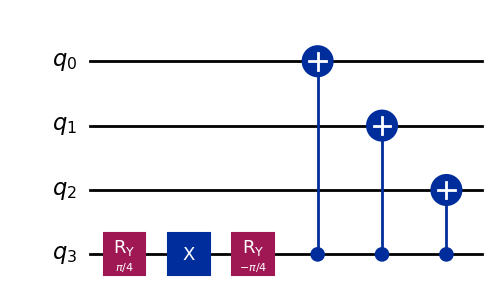

In [ ]:
# Circuit Diagram
circuit.draw("mpl")

In [ ]:
depth = circuit.depth()
print("Circuit Depth:", depth)

Circuit Depth: 4


## **QSharp**

In [ ]:
# Installing qsharp
!pip install qsharp
!pip install qsharp_widgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.2 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.1/170.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.4/727.4 kB 5.9 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
# importing necessary modules for qsharp
import numpy as np
import qsharp
from qsharp.utils import dump_operation
from qsharp_widgets import Circuit
from qsharp_widgets import SpaceChart, EstimateDetails

In [ ]:
%%qsharp

open Microsoft.Quantum.Diagnostics;
open Microsoft.Quantum.Measurement;
open Microsoft.Quantum.Arrays;
open Microsoft.Quantum.Math;


operation test(n:Int , List_1: Int[] , List_2:Int[] , List_3: Int[][] , List_4 : (Double,Double,Int[],Int)[] , List_5:Int[][]) : Unit {



    use q = Qubit[n];

    mutable n1 = Length(List_1);
    mutable Reversed_List_1 = List_1[Length(List_1) - 1 .. -1 .. 0];
    mutable List_2 =List_2;
    mutable List_3 =List_3;
    mutable List_4 =List_4;
    mutable List_5 =List_5;
    for i in Reversed_List_1 {

        if (i == 1)
        {
            mutable n2 = Length(List_2);
            mutable read_2 =List_2[n2-1];
            X(q[read_2]);
            set List_2 = List_2[0..Length(List_2)-2];

        }

        elif (i == 2)
        {
            mutable n3 = Length(List_3);
            mutable read_3 = List_3[n3-1];
            mutable r1 = read_3[0];
            mutable r2 = read_3[1];
            set List_3 = List_3[0..Length(List_3)-2];
            CX(q[r1],q[r2]) ;
        }

        elif (i == 3)
        {
          mutable n4 = Length(List_4);
          mutable read_4 = List_4[n4-1];
          mutable (a,b,c,d) = read_4;

          if c == [-1] {
            mutable sy1 = a;
            mutable sy2= b ;
            mutable  w = ArcTan(AbsD(sy1^0.5) / AbsD(sy2^0.5));
            mutable target = (n-1)-d;
            Ry(w,q[target]);
            X(q[target]);
            Ry(-w,q[target]);
            set List_4 = List_4[0..Length(List_4)-2];

          }

          else
          {
            mutable sy1 = a;
            mutable sy2= b ;
            mutable  w = ArcTan(AbsD(sy1^0.5) / AbsD(sy2^0.5));
            mutable target = (n-1)-d;
            let indices = c;
            mutable control = Repeated(q[0], Length(indices));
            Ry(w,q[target]);
            for idx in 0..Length(indices)-1 {
            set control w/= idx <- q[(n-1)-(indices[idx])];
            }
            Controlled X (control,q[target]);
            Ry(-w,q[target]);
            set List_4 = List_4[0..Length(List_4)-2];
          }

        }

        elif (i == 4)
        {
            mutable read_5 = List_5[0];
            mutable n5= Length(read_5);
                for b in 0..n5-1{
                    if (read_5[b]==1) {
                        X(q[(n-1)-b])}
                }
            set List_5 = List_5[0..Length(List_5)-1];

        }




        }
    Microsoft.Quantum.Diagnostics.DumpMachine();
    //let r = MeasureEachZ(q);
    ResetAll(q);
    //return r

}


operation test2(n:Int , S: Int[][]) : Unit {

    use q = Qubit[n];

    for b in 0..n-1{
            if S[0][b]==1{
                X(q[b])}
    }

    Microsoft.Quantum.Diagnostics.DumpMachine();
    //let r = MeasureEachZ(q);
    ResetAll(q);
    //return r
    }

In [ ]:
def Sparse_state_qsharp(S):

    List_1=[]    # store history of Gate types and their parameters (qubit numbering on which they are applied)
    List_2=[]    # Store X Gate history
    List_3=[]    # Store CX Gate history
    List_4=[]    # Store Multi- controlled Gate history
    List_5=[]    # Store Last step X Gates information


    n=len(S[0][0])        # n is number of qubits in required Sparse State.
    n9=[]                 # list of required number of control qubits in each splitting stage

    def find_qubit_with_unequal_sets(T): # This function is called from classical part of the algorithm i,e, function Algo1()

        best_qubit = None
        T_0=[]
        T_1=[]
        Max_difference = float('-inf')  # Initialize to negative infinity

        for b in range(n):
            # Split T into T_0 and T_1 based on qubit b
            T_0 = [x for x in T if x[0][b] == 0]
            T_1 = [x for x in T if x[0][b] == 1]

            # Check if both sets are non-empty
            if len(T_0) != 0 and len(T_1) != 0:
                difference = abs(len(T_0) - len(T_1))
                if difference > Max_difference:
                    Max_difference = difference
                    best_qubit = b
                    best_T_0 = T_0
                    best_T_1 = T_1

        return best_qubit,best_T_0, best_T_1

    def NOT(a):       # This is also needed as a part of updating basis state set S in each recursion of Algo1()
        if a==0:
            return 1
        else:
            return 0


    def Algo_1():    # This is classical function called by quantum function which can create Required Gates information in Lists
        dif_qubits = []
        dif_values = []
        T = S
        P = find_qubit_with_unequal_sets(T)


        # Step 5: Main loop
        while len(T) > 1:
            # Step 6: Find the qubit b
            P = find_qubit_with_unequal_sets(T)  # We already implement this logic to find the best qubit best_T_0 and best_T_1 above
            b = P[0]
            T_0 = P[1]
            T_1 = P[2]

            # Step 7: Append b to dif_qubits
            dif_qubits.append(b)
            if len(T_0) < len(T_1):
                # Step 9: Set T = T_0 and append 0 to dif_values
                T = T_0
                dif_values.append(0)
            else:
                # Step 10: Set T = T_1 and append 1 to dif_values
                T = T_1
                dif_values.append(1)
        # Step 14: Pop the last value appended to dif_qubits and store it as dif
        dif = dif_qubits.pop();
        #print("dif is  ", dif)
    # Step 15: Pop the last value that was appended to dif_values
        dif_values.pop();
    # Step 16: Store the single element in T as x_1
        x_1 = T[0]
    # step 17
    # T_prime subset of S denote the set of strings that have the values in dif_values on the bits dif_qubits
        T_prime = [x for x in S if all(x[0][q] == v for q, v in zip(dif_qubits, dif_values))]
    # Step 18: Remove x_1 from T'
        T_prime.remove(x_1)
    # Step 19: Second While loop for T_prime
        while len(T_prime) > 1:
        # Step 22: Find the qubit b_prime
            R = find_qubit_with_unequal_sets(T_prime)  # Implement logic to find the best qubit
            b_prime = R[0]
            T_prime_0 = R[1]
            T_prime_1 = R[2]
        # Step 7: Append b to dif_qubits

            dif_qubits.append(b_prime)

            if len(T_prime_0) < len(T_prime_1):
            # Step 9: Set T = T_0 and append 0 to dif_values
                T_prime = T_prime_0
                dif_values.append(0)
            else:
            # Step 10: Set T = T_1 and append 1 to dif_values
                T_prime = T_prime_1
                dif_values.append(1)
        x_2 = T_prime[0]


        if x_1[0][dif] != 1:
            List_1.append(1)
            List_2.append(n-1-dif)
            for x in S:
                x[0][dif]= NOT(x[0][dif])


        for b in range(n):
            if b != dif and x_1[0][b] != x_2[0][b]:
                # target b controlled on dif

                List_1.append(2)
                sx=[n-1-dif,n-1-b]
                List_3.append(sx)
                for x in S:
                    if x[0][dif]==1:
                        x[0][b]= NOT(x[0][b])

        for b in dif_qubits:
            if x_2[0][b] != 1:
                # not gate on line b
                List_1.append(1)
                List_2.append(n-1-b)
                for x in S:
                    x[0][b]= NOT(x[0][b])

        # virtual merging operation begins

        beta = x_1[1]            # probability of x_1
        alpha = x_2[1]           #probability of x_2

        # x_1 would merge into x_2   i.e.  x2 absorb probability of x1
        x_2[1]=x_2[1]+x_1[1]
        alpha=alpha/x_2[1]
        beta=beta/x_2[1]
        List_1.append(3)

        if len(dif_qubits)>0:
            n9.append(len(dif_qubits))
            sy = [alpha,beta,dif_qubits,dif]
        else:
            sy = [alpha,beta,dif]

        List_4.append(sy)
        # print("S before removing x1 is",S)
        S.remove(x_1)
        # print("S after removing x1 is",S)
        if len(S)>1:
            Algo_1()

        else:
            List_1.append(4)
            List_5.append(x_2[0])


    if len(S)>1:
      Algo_1()
      def convert_to_tuples(input_list):
        output_list = []
        for sublist in input_list:
            if len(sublist) == 3:
                sublist.insert(-1, [-1])
            output_list.append(tuple(sublist))
        return output_list

      List_4 = convert_to_tuples(List_4)


      state = qsharp.eval(f"test({n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})")
      circuit = Circuit(qsharp.circuit(f"test({n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})"))
      result = qsharp.estimate(f"test({n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})")


    else:
      state = qsharp.eval(f"test2({n},{S})")
      circuit = Circuit(qsharp.circuit(f"test2({n},{S}"))
      results = qsharp.estimate(f"test2({n},{S})")

    return  state, circuit , result

In [ ]:
# Input
# S= [[[0,0],1/2],[[1,1],1/2]] # Example 01

# S =[[[0,0,0],1/2],[[1,1,1],1/2]] # Example 02

S =[[[0,0,0,0],1/2], [[1,1,1,1],1/2]] # Example 03

# S =[[[0,0,0,0,0],1/2], [[ 1, 1,1,1,1],1/2]] # Example 04

# S = [[[0,0,0,0,0,0],1/2], [[ 1, 1,1,1,1,1],1/2]] # Example 05

In [ ]:
State, circuit , result = Sparse_state_qsharp(S)

STATE:
|0000⟩: 0.7071+0.0000𝑖
|1111⟩: 0.7071+0.0000𝑖


In [ ]:
# circuit diagram
circuit

Circuit(circuit_json='{"operations":[{"gate":"ry","displayArgs":"0.7854","targets":[{"qId":3,"type":0}]},{"gat…

In [ ]:
# Result
result.summary

"This is a runtime estimate for the execution time of the algorithm. In general, the execution time corresponds to the duration of one logical cycle (2,800 nanosecs) multiplied by the 2 logical cycles to run the algorithm. If however the duration of a single T factory (here: 26,000 nanosecs) is larger than the algorithm runtime, we extend the number of logical cycles artificially in order to exceed the runtime of a single T factory.Runtime",28 microsecs,Total runtime
"The value is computed as the number of logical qubits after layout (15) (with a logical error rate of 1.67e-5) multiplied by the clock frequency (357,142.86), which is the number of logical cycles per second.rQOPS",5.36M,Reliable quantum operations per second
"This value represents the total number of physical qubits, which is the sum of 1,470 physical qubits to implement the algorithm logic, and 4,000 physical qubits to execute the T factories that are responsible to produce the T states that are consumed by the algorithm.Physical qubits",5.47k,Number of physical qubits
"Laying out the logical qubits in the presence of nearest-neighbor constraints requires additional logical qubits. In particular, to layout the $Q_{\rm alg} = 4$ logical qubits in the input algorithm, we require in total $2 \cdot Q_{\rm alg} + \lceil \sqrt{8 \cdot Q_{\rm alg}}\rceil + 1 = 15$ logical qubits.Logical algorithmic qubits",15,Number of logical qubits for the algorithm after layout
"To execute the algorithm using _Parallel Synthesis Sequential Pauli Computation_ (PSSPC), operations are scheduled in terms of multi-qubit Pauli measurements, for which assume an execution time of one logical cycle. Based on the input algorithm, we require one multi-qubit measurement for the 0 single-qubit measurements, the 0 arbitrary single-qubit rotations, and the 2 T gates, three multi-qubit measurements for each of the 0 CCZ and 0 CCiX gates in the input program, as well as No rotations in algorithm multi-qubit measurements for each of the 0 non-Clifford layers in which there is at least one single-qubit rotation with an arbitrary angle rotation.Algorithmic depth",2,Number of logical cycles for the algorithm
"This number is usually equal to the logical depth of the algorithm, which is 2. However, in the case in which a single T factory is slower than the execution time of the algorithm, we adjust the logical cycle depth to exceed the T factory's execution time.Logical depth",10,Number of logical cycles performed
This is the number of logical cycles that can be performed within one second. The logical cycle time is 3 microsecs.Clock frequency,357.14k,Number of logical cycles per second
"To execute the algorithm, we require one T state for each of the 2 T gates, four T states for each of the 0 CCZ and 0 CCiX gates, as well as No rotations in algorithm for each of the 0 single-qubit rotation gates with arbitrary angle rotation.Number of T states",2,Number of T states consumed by the algorithm
"The total number of T factories 2 that are executed in parallel is computed as $\left\lceil\dfrac{\text{T states}\cdot\text{T factory duration}}{\text{T states per T factory}\cdot\text{algorithm runtime}}\right\rceil = \left\lceil\dfrac{2 \cdot 26,000\;\text{ns}}{1 \cdot 28,000\;\text{ns}}\right\rceil$Number of T factories",2,Number of T factories capable of producing the demanded 2 T states during the algorithm's runtime
"In order to prepare the 2 T states, the 2 copies of the T factory are repeatedly invoked 1 times.Number of T factory invocations",1,Number of times all T factories are invoked
"The 1,470 are the product of the 15 logical qubits after layout and the 98 physical qubits that encode a single logical qubit.Physical algorithmic qubits",1.47k,Number of physical qubits for the algorithm after layout


# **Results**

## **Simulation**

### **For GHZ States**

We run this new implementation in different langauages (i.e Classiq, Qiskit and Qsharp) for Greenberger-Horne-Zeilinger (GHZ) states which are type of entangled quantum states that involves multiple qubits. It is particularly notable for its use in demonstrating quantum nonlocality and in various quantum information protocols. The general form of a GHZ state for \( n \) qubits is given by:

$$|\text{GHZ}\rangle = \frac{1}{\sqrt{2}} \left( |0\rangle^{\otimes n} + |1\rangle^{\otimes n} \right)$$


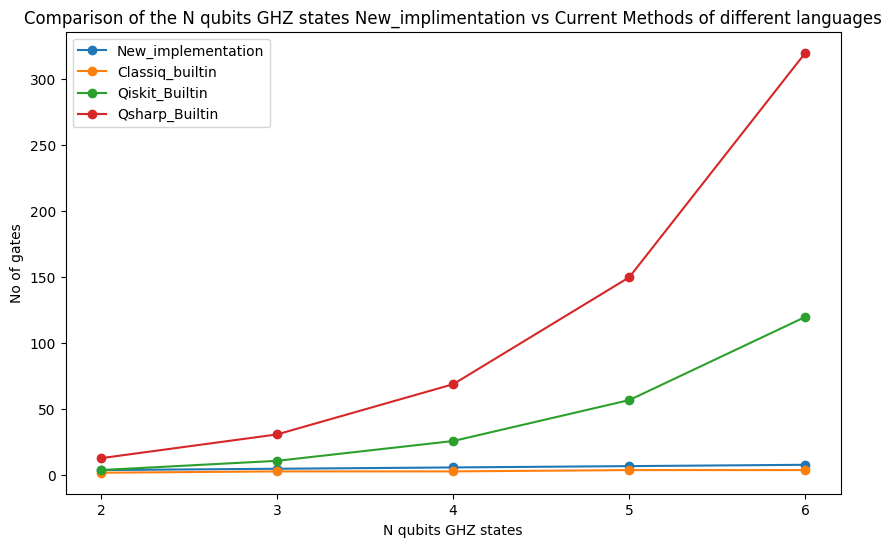

In [ ]:
import matplotlib.pyplot as plt

# Data we gather by running the implementation
GHZ_new_implimentation = [4,5,6,7,8]
GHZ_Classiq_builtin = [2,3,3,4,4]
GHZ_qiskit_builtin = [4,11,26,57,120]
GHZ_QSharp_Builtin = [13,31,69,150,320]

# Define labels for the x-axis
labels =["2","3","4","5","6"]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the lines
plt.plot(labels, GHZ_new_implimentation, marker='o', label='New_implementation')
plt.plot(labels, GHZ_Classiq_builtin, marker='o', label='Classiq_builtin')
plt.plot(labels, GHZ_qiskit_builtin, marker='o', label='Qiskit_Builtin')
plt.plot(labels, GHZ_QSharp_Builtin, marker='o', label='Qsharp_Builtin')

# Add some text for labels, title, and custom x-axis tick labels
plt.xlabel('N qubits GHZ states')
plt.ylabel('No of gates')
plt.title('Comparison of the N qubits GHZ states New_implimentation vs Current Methods of different languages')
plt.legend()

# Show the plot
plt.show()

### **For W States**

We also run this implementation on W states which are another type of entangled quantum state that involves multiple qubits. Unlike the GHZ state, the W state is particularly notable for its robustness against the loss of qubits, which makes it valuable for certain quantum information protocols.

The general form of a W state for \( n \) qubits is given by:

$$|\text{W}\rangle = \frac{1}{\sqrt{n}} \left( |10\ldots0\rangle + |01\ldots0\rangle + \ldots + |00\ldots1\rangle \right)$$

This can be written explicitly as:

$$|\text{W}\rangle = \frac{1}{\sqrt{n}} \sum_{i=1}^{n} |0\ldots010\ldots0\rangle,$$

where the \( $|0\ldots010\ldots0\rangle$ \) notation indicates that the \( i \)-th qubit is in the \( $|1\rangle$ \) state and all other \( n-1 \) qubits are in the \( $|0\rangle$ \) state.

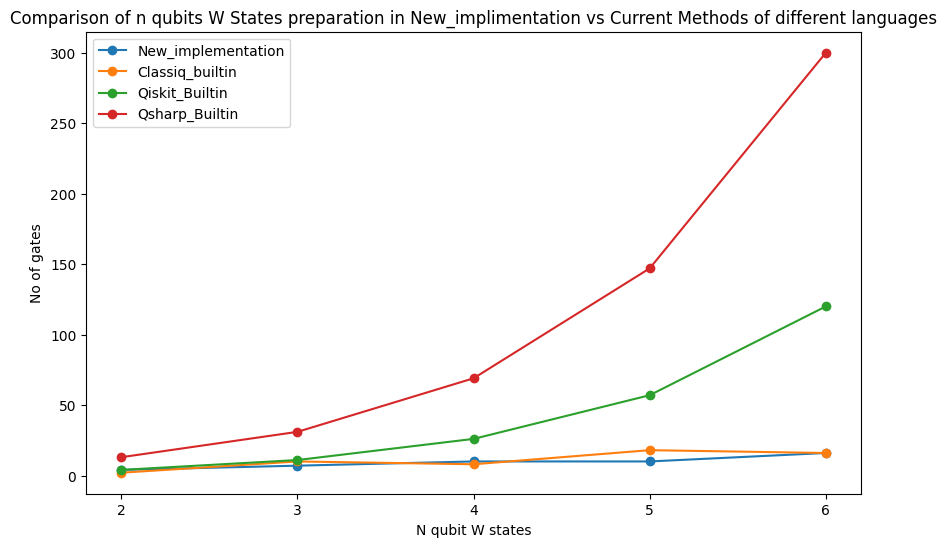

In [ ]:
import matplotlib.pyplot as plt

# Data we gather by running the implementation
New_implementation = [4,7,10,10,16]
Classiq_builtin = [2,10,8,18,16]
Qiskit_Builtin = [4,11,26,57,120]
Qsharp_Builtin = [13,31,69,147,300]

# Define labels for the x-axis
labels =["2","3","4","5","6"]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the lines
plt.plot(labels, New_implementation, marker='o', label='New_implementation')
plt.plot(labels, Classiq_builtin, marker='o', label='Classiq_builtin')
plt.plot(labels, Qiskit_Builtin, marker='o', label='Qiskit_Builtin')
plt.plot(labels, Qsharp_Builtin, marker='o', label='Qsharp_Builtin')

# Add some text for labels, title, and custom x-axis tick labels
plt.xlabel('N qubit W states')
plt.ylabel('No of gates')
plt.title('Comparison of n qubits W States preparation in New_implimentation vs Current Methods of different languages')
plt.legend()

# Show the plot
plt.show()

### **For Random States**

We enerate random states through qiskit random state generators and then prepare these states using Qiskit native and Sparse state algorithm (our) implrmentation. For each n we genarate 100 random states and explore the pattern that when n is incerasing our implemented algorithm have less depth than the qiskit builtins ones.

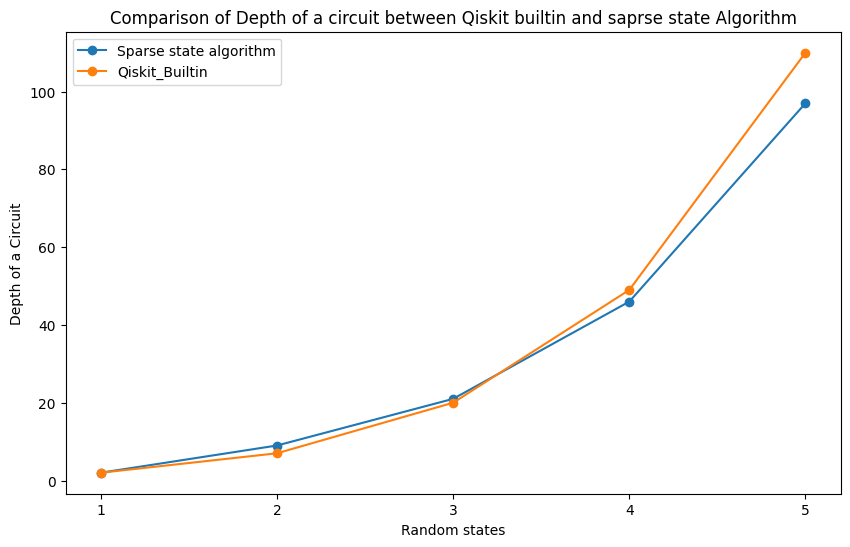

In [ ]:
import matplotlib.pyplot as plt

# Data

Qiskit_Builtin_implementaion = [2,7,20,49,110]
Sparse_state_implementation = [2,9,21,46,97]


# Define labels for the x-axis
labels =["1","2","3","4","5"]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the lines
plt.plot(labels, Sparse_state_implementation, marker='o', label='Sparse state algorithm')
plt.plot(labels, Qiskit_Builtin_implementaion, marker='o', label='Qiskit_Builtin')


# Add some text for labels, title, and custom x-axis tick labels
plt.xlabel('Random states')
plt.ylabel('Depth of a Circuit')
plt.title('Comparison of Depth of a circuit between Qiskit builtin and saprse state Algorithm')
plt.legend()

# Save the figure
plt.savefig('random.png')

# Show the plot
plt.show()

## **Resourse Estimation**

We conducted an in-depth analysis by implementing our algorithm in both Qiskit and Q# to gather comprehensive data on its performance and resource requirements. Following the implementation, we utilized the Microsoft Quantum Resource Estimator to accurately evaluate the necessary quantum resources. This estimator allowed us to assess the number of qubits, gate operations, and overall computational complexity associated with our algorithm, providing critical insights into its feasibility and efficiency on current and near-future quantum hardware. By employing these advanced tools, we ensured a thorough and precise estimation of the quantum resources required, facilitating better design and optimization of our quantum algorithms.

---

As an example we implement the algorithm on evaluating the resource requirements for generating and manipulating entangled states, such as the Greenberger-Horne-Zeilinger (GHZ) and W states. These entangled states are fundamental to various quantum information protocols, including quantum cryptography, quantum communication, and quantum computation. By understanding the resource implications of these states, we can better design and optimize quantum algorithms that utilize them.

### **For GHZ States**

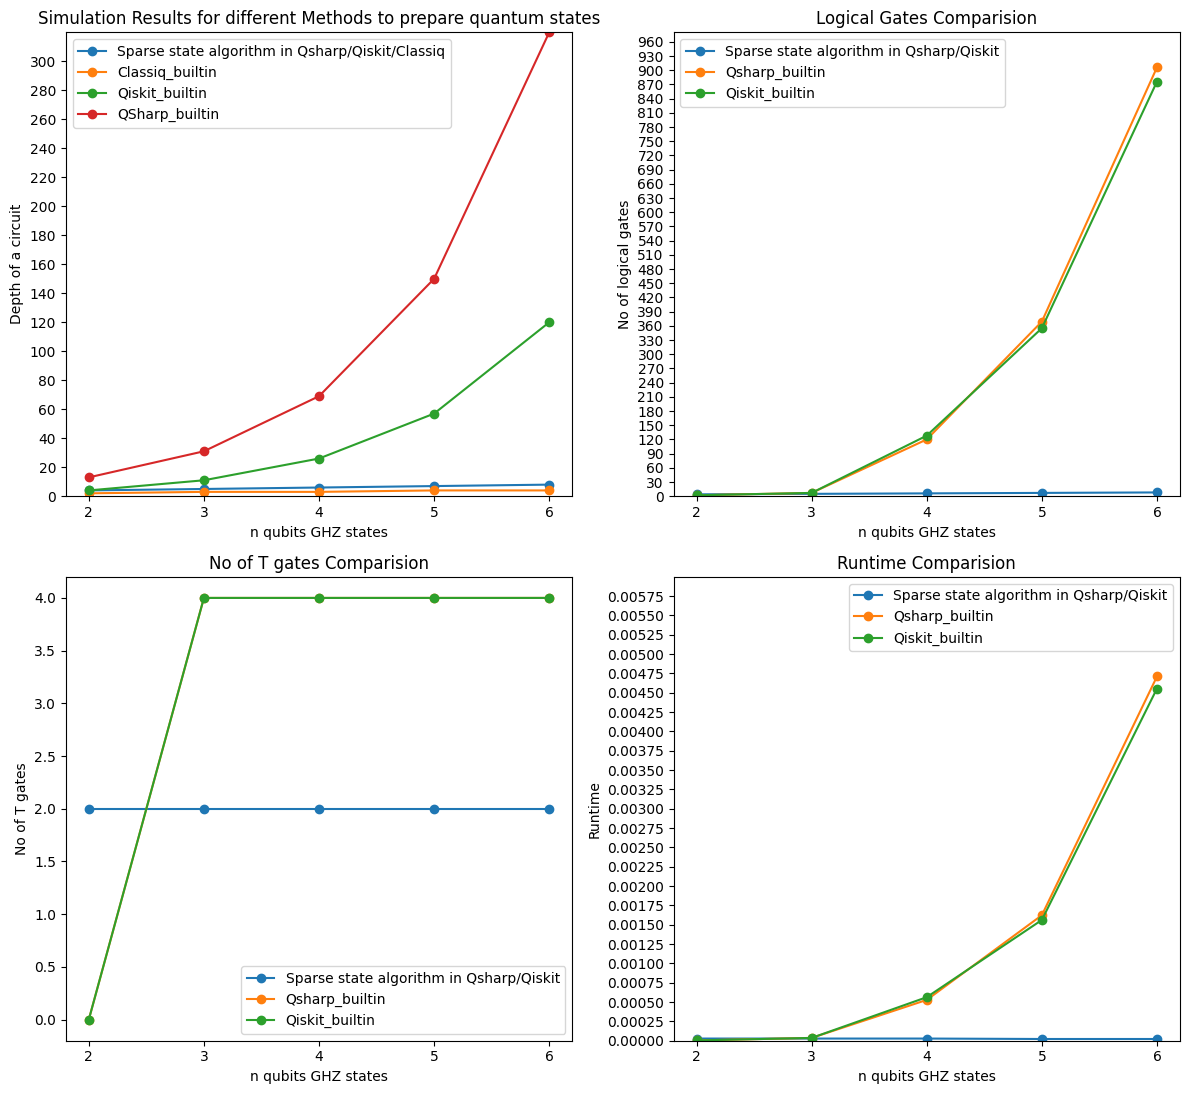

In [ ]:
# GHZ
import numpy as np
import matplotlib.pyplot as plt


labels = ["2","3","4","5","6"]

# We gather this data by running the implementations

GHZ_new_implimentation = [4,5,6,7,8]
GHZ_Classiq_builtin = [2,3,3,4,4]
GHZ_qiskit_builtin = [4,11,26,57,120]
GHZ_QSharp_Builtin = [13,31,69,150,320]


Logical_depth_Qsharp_new_GHZ =  [4, 5, 6, 7, 8]
Logical_depth_Qsharp_GHZ =  [2, 7, 120, 369, 906]
Logical_depth_qiskit_ghz =  [2, 7, 128, 355, 876]

Num_T_gates_Qsharp_new_GHZ =  [2, 2, 2, 2, 2]
Num_T_gates_Qsharp_GHZ =  [0, 4, 4, 4, 4]
Num_T_gates_qiskit_ghz =  [0, 4, 4, 4, 4]

Runtime_Qsharp_new_GHZ =  [2.8000000000000003e-05, 2.8000000000000003e-05, 2.8000000000000003e-05, 2.2400000000000002e-05, 2.2400000000000002e-05]
Runtime_Qsharp_GHZ =  [4.000000000000001e-06, 3.6400000000000004e-05, 0.000528, 0.0016236, 0.0047112000000000005]
Runtime_qiskit_ghz =  [4.000000000000001e-06, 3.6400000000000004e-05, 0.0005632, 0.001562, 0.004555200000000001]


# Create a figure
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# First subplot
axs[0, 0].plot(labels, GHZ_new_implimentation, marker='o', label='Sparse state algorithm in Qsharp/Qiskit/Classiq')
axs[0, 0].plot(labels, GHZ_Classiq_builtin, marker='o', label='Classiq_builtin')
axs[0, 0].plot(labels, GHZ_qiskit_builtin, marker='o', label='Qiskit_builtin')
axs[0, 0].plot(labels, GHZ_QSharp_Builtin, marker='o', label='QSharp_builtin')
axs[0, 0].set_title('Simulation Results for different Methods to prepare quantum states')
axs[0, 0].set_ylabel('Depth of a circuit')
axs[0, 0].set_xlabel("n qubits GHZ states")
axs[0, 0].legend()
axs[0, 0].set_ylim(0, 320)  # Set y-axis limits
axs[0, 0].set_yticks(np.arange(0, 320, 20))  # Set y-axis ticks


# Second subplot
axs[0, 1].plot(labels, Logical_depth_Qsharp_new_GHZ, marker='o', label='Sparse state algorithm in Qsharp/Qiskit')
axs[0, 1].plot(labels, Logical_depth_Qsharp_GHZ, marker='o', label='Qsharp_builtin')
# axs[0, 1].plot(labels, Logical_depth_qiskit_new_ghz, marker='o', label='Niels_implementation_qiskit')
axs[0, 1].plot(labels, Logical_depth_qiskit_ghz, marker='o', label='Qiskit_builtin')
axs[0, 1].set_title('Logical Gates Comparision')
axs[0, 1].set_ylabel('No of logical gates')
axs[0, 1].set_xlabel("n qubits GHZ states")
axs[0, 1].legend()
axs[0, 1].set_ylim(0, 980)  # Set y-axis limits
axs[0, 1].set_yticks(np.arange(0, 980, 30))  # Set y-axis ticks


# Third subplot
axs[1, 0].plot(labels, Num_T_gates_Qsharp_new_GHZ, marker='o', label='Sparse state algorithm in Qsharp/Qiskit')
axs[1, 0].plot(labels, Num_T_gates_Qsharp_GHZ, marker='o', label='Qsharp_builtin')
# axs[1, 0].plot(labels, Num_T_gates_qiskit_new_ghz, marker='o', label='Niels_implementation_qiskit')
axs[1, 0].plot(labels, Num_T_gates_qiskit_ghz, marker='o', label='Qiskit_builtin')
axs[1, 0].set_title('No of T gates Comparision')
axs[1, 0].set_ylabel('No of T gates')
axs[1, 0].set_xlabel("n qubits GHZ states")
axs[1, 0].legend()


# Fourth subplot
axs[1, 1].plot(labels, Runtime_Qsharp_new_GHZ, marker='o', label='Sparse state algorithm in Qsharp/Qiskit')
axs[1, 1].plot(labels, Runtime_Qsharp_GHZ, marker='o', label='Qsharp_builtin')
# axs[1, 1].plot(labels, Runtime_qiskit_new_ghz, marker='o', label='Niels_implementation_qiskit')
axs[1, 1].plot(labels, Runtime_qiskit_ghz, marker='o', label='Qiskit_builtin')
axs[1, 1].set_title('Runtime Comparision')
axs[1, 1].set_ylabel('Runtime')
axs[1, 1].set_xlabel("n qubits GHZ states")
axs[1, 1].legend()
axs[1, 1].set_ylim(0, 0.006)  # Set y-axis limits
axs[1, 1].set_yticks(np.arange(0, 0.006, 0.00025))  # Set y-axis ticks

plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# Save the figure
plt.savefig('combined_graphs_with_multiple_curves.png')

# Show the figure
plt.show()

### **For W States**

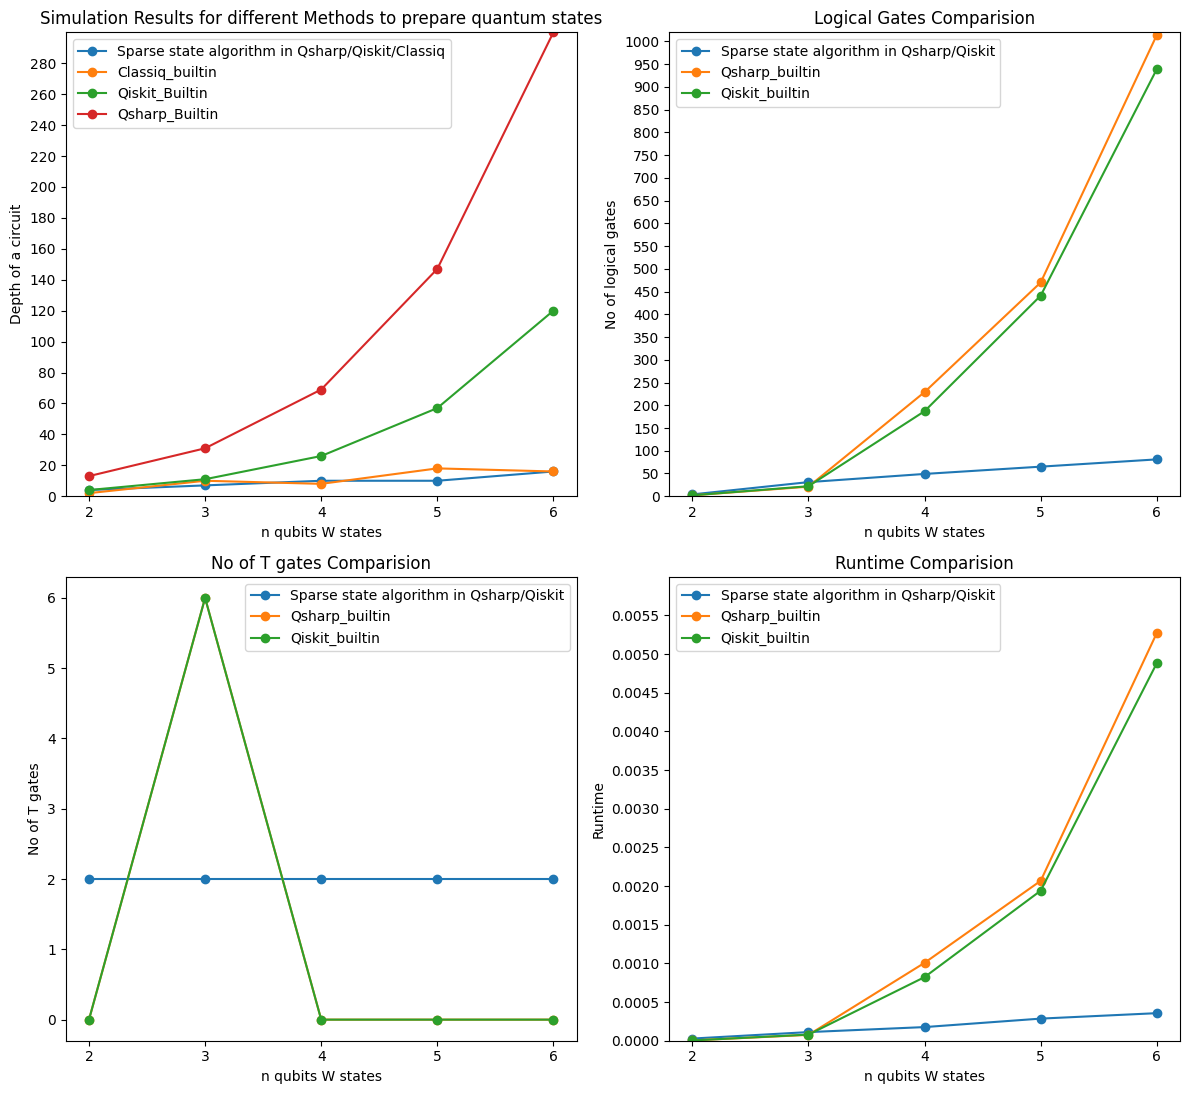

In [ ]:
# W State

import numpy as np
import matplotlib.pyplot as plt


labels = ["2","3","4","5","6"]

# We gather this data by running the implementations

Niles_implementation = [4,7,10,10,16]
Classiq_builtin = [2,10,8,18,16]
Qiskit_Builtin = [4,11,26,57,120]
Qsharp_Builtin = [13,31,69,147,300]



Logical_depth_Qsharp_new_W =  [4, 31, 49, 65, 81]
Logical_depth_Qsharp_W =  [2, 21, 229, 470, 1014]
Logical_depth_qiskit_W =  [2, 22, 187, 441, 939]

Num_T_gates_Qsharp_new_W =  [2, 2, 2, 2, 2]
Num_T_gates_Qsharp_W =  [0, 6, 0, 0, 0]
Num_T_gates_qiskit_W =  [0, 6, 0, 0, 0]

Runtime_Qsharp_new_W =  [2.8000000000000003e-05, 0.0001116, 0.0001764, 0.000286, 0.00035640000000000004]
Runtime_Qsharp_W =  [4.000000000000001e-06, 7.560000000000001e-05, 0.0010076, 0.002068, 0.0052728]
Runtime_qiskit_W =  [4.000000000000001e-06, 7.92e-05, 0.0008228, 0.0019404000000000001, 0.0048828000000000005]


# Create a figure
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# First subplot
axs[0, 0].plot(labels, Niles_implementation, marker='o', label='Sparse state algorithm in Qsharp/Qiskit/Classiq')
axs[0, 0].plot(labels, Classiq_builtin, marker='o', label='Classiq_builtin')
axs[0, 0].plot(labels, Qiskit_Builtin, marker='o', label='Qiskit_Builtin')
axs[0, 0].plot(labels, Qsharp_Builtin, marker='o', label='Qsharp_Builtin')
axs[0, 0].set_title('Simulation Results for different Methods to prepare quantum states')
axs[0, 0].set_ylabel('Depth of a circuit')
axs[0, 0].set_xlabel("n qubits W states")
axs[0, 0].legend()
axs[0, 0].set_ylim(0, 300)  # Set y-axis limits
axs[0, 0].set_yticks(np.arange(0, 300, 20))  # Set y-axis ticks



# Second subplot
axs[0, 1].plot(labels, Logical_depth_Qsharp_new_W, marker='o', label='Sparse state algorithm in Qsharp/Qiskit')
axs[0, 1].plot(labels, Logical_depth_Qsharp_W, marker='o', label='Qsharp_builtin')
axs[0, 1].plot(labels, Logical_depth_qiskit_W, marker='o', label='Qiskit_builtin')
axs[0, 1].set_title('Logical Gates Comparision')
axs[0, 1].set_ylabel('No of logical gates')
axs[0, 1].set_xlabel("n qubits W states")
axs[0, 1].legend()
axs[0, 1].set_ylim(0, 1020)  # Set y-axis limits
axs[0, 1].set_yticks(np.arange(0, 1020, 50))  # Set y-axis ticks


# Third subplot
axs[1, 0].plot(labels, Num_T_gates_Qsharp_new_W, marker='o', label='Sparse state algorithm in Qsharp/Qiskit')
axs[1, 0].plot(labels, Num_T_gates_Qsharp_W, marker='o', label='Qsharp_builtin')
axs[1, 0].plot(labels, Num_T_gates_qiskit_W, marker='o', label='Qiskit_builtin')
axs[1, 0].set_title('No of T gates Comparision')
axs[1, 0].set_ylabel('No of T gates')
axs[1, 0].set_xlabel("n qubits W states")
axs[1, 0].legend()




# Fourth subplot
axs[1, 1].plot(labels, Runtime_Qsharp_new_W, marker='o', label='Sparse state algorithm in Qsharp/Qiskit')
axs[1, 1].plot(labels, Runtime_Qsharp_W, marker='o', label='Qsharp_builtin')
axs[1, 1].plot(labels, Runtime_qiskit_W, marker='o', label='Qiskit_builtin')
axs[1, 1].set_title('Runtime Comparision')
axs[1, 1].set_ylabel('Runtime')
axs[1, 1].set_xlabel("n qubits W states")
axs[1, 1].legend()
axs[1, 1].set_ylim(0, 0.006)  # Set y-axis limits
axs[1, 1].set_yticks(np.arange(0, 0.006, 0.0005))  # Set y-axis ticks



# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# Save the figure
plt.savefig('combined_graphs_with_multiple_curves_W.png')

# Show the figure
plt.show()


# Conclusion

The resource estimation results are consistent with the simulation outcomes, showing that the number of qubits required remains the same across both our new implementation and the built-in methods for generating states in Qiskit and Q#. Notably, our implementation significantly reduces other key parameters such as logical depth, runtime, and the number of T gates compared to the built-in methods of these languages.